# Developer Documentation

Documentation for use of the ADnum, ADmath, and ADgraph modules outside of the web application.

## What are the ADnum, ADmath, and ADgraph modules?
This collection of modules can be used to perform automatic differentiation of functions of one or more variables and to visualize the underlying computational graph and table for both the forward and reverse mode of automatic differentiation.

## Introduction to Automatic Differentiation

Differentiation is a fundamental operation for computational science. Used in a variety of applications from optimization to sensitivity analysis, differentiation is most useful when two conditions are met: it must be exact (up to machine precision) and computationally efficient.

Automatic differentiation (AD) (i.e. algorithmic differentiation, computational differentiation) computes the derivative of a function, unique for its ability to handle complex combinations of functions without sacrificing the accuracy. Regardless of how complex the function may be, AD takes advantage of the fact that the function can be decomposed into a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.). 

Through computing the derivatives of these basic elementary functions and repeatedly applying the chain rule, AD meets the two aforementioned conditions, making it useful in a variety of applications including:
- Machine learning (ability to understand data and make models/predictions), where backpropagation is used to parameterize neural nets among other parameter optimization techniques
- Parameter optimization (ability to choose best parameter values under given conditions), where methods requiring derivatives may be used to find the optima
- Sensitivity analysis (ability to understand different factors and their impact), which requires computing partial derivatives with respect to different inputs and parameters
- Physical modeling (ability to visualize and depict data through models), where different physical properties are related through derivatives (for example, acceleration is the derivative of velocity)
- Probabilistic inference, where many sampling methods (for example, Hamiltonian Monte Carlo) are derivative based

For a more detailed exposition of AD and the underlying processes, we invite you to read our unit on [Read the Docs](https://auto-ed.readthedocs.io/en/latest/) and use the accompanying web application built from this package.

## Installation

The files can be downloaded from the github repository using:

    git clone https://github.com/lindseysbrown/Auto-eD.git

To install package dependencies, run the following command:

    pip install -r requirements.txt

For those not interested in developing the code or working with functions of more than 5 input variables or more than 3 outputs, the computations performed by this package are available as a [web application](https://autoed.herokuapp.com/) without any installation required.  Alternatively, to run the web application locally, the following command will launch the application from the cloned repository:

    python ADapp.py

## Importing the Modules
   
For full functionality, the user should include the following imports to use the automatic differentiation package:

    from ADnum import ADnum
    
    import ADmath

    import ADgraph

In [1]:
#commands to change to the correct directory
%pwd 

'C:\\Users\\Lindsey\\Documents\\lindsey\\Harvard G4\\FallSemester\\CS207Teaching\\Auto-eD'

In [2]:
#import package functionality
from ADnum import ADnum
import ADmath
import ADgraph

#suggested imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Getting Started
After importing the necessary modules, a user creates a class instance of an `ADnum` with the value to be used as input to a function.

### Steps for Instantiating Variables and Functions

#### 1. Initialize an input variable (i.e. `x`) with the specific value where the function will be evaluated.
- Either initialize the value and the derivative

```python

x = ADnum(5, der = 1)

```

- Or specify the number of input variables (ins) to the function and the index (ind) of each variable

```python
x = ADnum(5, ins = 1, ind = 0)
```

#### 2. Define a function (i.e. `f`) with the variable and any other elementary functions from the ADmath module
- Either directly combine previously created ADnum objects

```python
f = ADmath.sin(x)+3*ADmath.tan(x)
```

-Or define a function and provide an ADnum object as input
```python
def g(z):
    return ADmath.sin(z)+3*ADmath.tan(z)
g(x) #an ADnum
```

####    3. `f.val` will return the value of the function evaluated at the specific value
####    4. `f.der` will return the derivative at the specific value
####    5.  Visualize f and the computational process using the tools in the `ADgraph` module
-See the section on function visualization for more on how to use these tools.

Full code examples for scalar or vector inputs and scalar or vectored valued functions are given below.

### Scalar Function of a Scalar Variable

Here we show several examples of scalar functions of scalar variables, including an example of using our package to implement Newton's Method. 

In [3]:
# Step 1: intialize x and y to a specific value
x = ADnum(3, ins = 2, ind = 0) 
y = ADnum(4, ins = 2, ind= 1)

# Step 2: define a function f
f = 2 * y + 2*x**2

# Steps 3 and 4: Use the class attributes to access the value and 
# deriviative of the function at the value of the input x 

print(f.val) 
print(f.der) 
print(x.val)
print(x.der) 
print(y.val)
print(y.der)


26.0
[12.  2.]
3.0
[1. 0.]
4.0
[0. 1.]


In [4]:
#another example with a trignometric function, using the ADmath module

x = ADnum(np.pi, der = [1]) # Step 1: initialize x, this time at pi
f = ADmath.sin(x) # Step 2: create a function, using elementary functions from the ADmath module

#Steps 3 and 4: Use the class attributes to access the value and derivative
print(f.val) # should print 1.22e-16 due to floating point error in numpy implementation (should be 0)
print(f.der) # should print -1.0
print(x.val) # should print 3.14
print(x.der) # should print 1

1.2246467991473532e-16
[-1.]
3.141592653589793
[1.]


Suppose we wanted to easily be able to access the value and derivative of a function at many different points.  As an alternative to the method for defining `f` in the previous two examples, we could define `f` as a python function:

In [5]:
#example to easily access value and derivative at multiple points by defining f as a function
def f(x):
    return x + ADmath.exp(x)

#get the value and derivative at 1
y = ADnum(1, der = [1])
print(f(y).val, f(y).der)

#an alternate approach to get the value and derivative at 1
print(f(ADnum(1, der = [1])).val, f(ADnum(1, der = [1])).der)

3.718281828459045 [3.71828183]
3.718281828459045 [3.71828183]


Notice that in the above example, we required the natural exponential, an elementary function, to be used from the ADmath package, so that f may take as input and return an ADnum object.

### Newton's Method for a Scalar Valued Function
One basic application of differentiation is Newton's method for finding roots of a function.  For demonstration of using our package for such an application, we will consider the function
$$f(x) = x^2 + \sin(x)$$
which we know has a root at $x=0$.  The plot below also shows that the function has an additional root near -1.

Text(0.5, 1.0, 'Plot of f(x) Showing Two Roots')

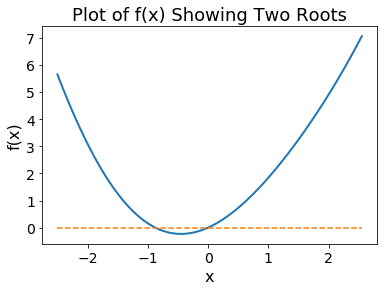

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-2.5, 2.55, 1000)
f = x**2+np.sin(x)

plt.plot(x, f, linewidth = 2)
plt.plot(x, np.zeros((1000,)), '--')
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize =14)
plt.title('Plot of f(x) Showing Two Roots', fontsize = 18)

In [7]:
#implementation of Newton's method using our AD package, without hardcoding the derivative

#function that we wish to find the roots of
def f(x):
    return x**2+ADmath.sin(x)

#Newton's method
x = ADnum(1, der = [1]) #set an initial guess for the root

for i in range(1000):
    dx = -f(x).val/f(x).der #get change using ADnum attributes
    if np.abs(dx) < .000001: #check if within some tolerance
        print('Root found at: ' + str(x.val))
        break
    x = x+dx #update the guess



Root found at: [1.20947143e-11]


In the above, we found the root at zero.  Using a different initialization point, we can find the other root of the function.

In [8]:
y = ADnum(-1, der = [1]) #set an initial guess for the root

for i in range(1000):
    dy = -f(y).val/f(y).der #get change using ADnum attributes
    if np.abs(dy) < .000001: #check if within some tolerance
        print('Root found at: ' + str(y.val))
        break
    y = y+dy #update the guess

Root found at: [-0.8767263]


## Functions of Multiple Inputs, Functions of Vector Valued Inputs, and Vector Valued Functions


### Functions of Multiple Variables
For a function with more than one input variable, the sequence is similar except when creating ADnum objects, the user must specify the total number of input variables, and the index of each variable in the gradient (so the the constructor of the ADnum class can correctly assign the derivative of the input variable with the appropriate seed vector):
#### 1. initialize each variable to a specific value where the function should be evaluated
-In addition to the value, the user must provide the number of inputs using the keyword argument `ins` and the index of the input variable being created using the keyword argument `ind`

#### 2. return the gradient as a numpy array when `f.der` is called  
-The gradient will be a numpy array, where `f.der[ind]` gives the partial derivative of f with respect to the variable created with the specified index `ind`.

In [9]:
# scalar function, multi variables
x = ADnum(2, ins = 2, ind = 0)
y = ADnum(3, ins = 2, ind = 1)
f = 3 * x**3 + 2 * y**3
print(f.val)
print(f.der)
print(x.val)
print(x.der)
print(y.val)
print(y.der)

78.0
[36. 54.]
2.0
[1. 0.]
3.0
[0. 1.]


### Vector-valued Functions
Each component of a vector valued function is just a scalar valued function of one or more input variables.  Thus, we can easily combine the previous results to get the Jacobian of a vector valued function.  

In [10]:
x = ADnum(2, ins = 2, ind = 0)
y = ADnum(3, ins = 2, ind = 1)
F = [x**2, x+y, 4*y] #define a vector valued function

print(F[0].val)
print(F[0].der) #derivative of the first component of F with respect to x and y
print(F[1].val)
print(F[1].der)
print(F[2].val)
print(F[2].der)


4.0
[4. 0.]
5.0
[1. 1.]
12.0
[0. 4.]


### Functions of Vector Inputs
For functions which take vectors as inputs, we can also define ADnum objects but by assigning the value as a list.

In [11]:
#function of a single vector
X = ADnum([1, 2, 3], ins = 1, ind = 0)
f = 3*X + ADmath.exp(X)

print(f.val)
print(f.der)
print(X.val)
print(X.der)

[ 5.71828183 13.3890561  29.08553692]
[ 5.71828183 10.3890561  23.08553692]
[1. 2. 3.]
[1. 1. 1.]


In [18]:
#function of multiple vector inputs
X = ADnum([1, 2, 1], ins = 2, ind = 0)
Y = ADnum([4, 5, 6], ins =2, ind = 1)
G = X + Y

print(G.val)
print(G.der)
print(X.val)
print(X.der)
print(Y.val)
print(Y.der)

[5. 7. 7.]
[[1. 1. 1.]
 [1. 1. 1.]]
[1. 2. 1.]
[[1. 1. 1.]
 [0. 0. 0.]]
[4. 5. 6.]
[[0. 0. 0.]
 [1. 1. 1.]]


# Implementation of Automatic Differentiation
Automatic differentiation is implemented through the use of `ADnum` objects, which have both a value and derivative as attributes.  We build the functions for which we want to take derivatives from these `ADnum` objects as well as the special elementary functions defined for `ADnum` objects in the `ADmath` module.  Each of these functions returns an `ADnum` object so has an associated value and derivative.

Each of these attributes is either a scalar or a numpy array for ease of computation.  In the case of scalar input, the derivative is also a scalar.  For vector valued input, the derivative is the gradient of the function, stored as a numpy array.

In order to build and store computational graphs in the ADgraph module, we use a dictionary to represent the graph, where the keys are the nodes of the graph, stored as `ADnum` objects, and the values associated with each key are the children of that node, stored as lists of tuples of the form (ADnum object, string), where the string describes the function that forms the edge for each node.

### Implemented Methods [TO DO: reverse mode]
The main class is the `ADnum` module, which is used to create `ADnum` objects.  It takes as input a single scalar input or a vector input (as a numpy array) and outputs an `ADnum` object.  The `ADnum` objects store the current value of the function and its derivative as attributes. 

These two attributes represent the two major functionalities desired of the class.  The `val` attribute is the ADnum object evaluated at the given value and the `der` attribute is its derivative at the given value. 

In addition to these basic attributes, ADnum objects also have a `constant` attribute, which is set to 0 or 1 depending on whether the object is a constant or variable.  This distinction is used in making computational graphs and tables, which also rely on the `graph` attribute.  This attribute is a dictionary containing key-value pairs of ADnum objects and lists of the ADnum objects that were combined to build the ADnum object (essentially using a dictionary to store a graph of nodes and edges). 

The constructor for this class, using variable keyword arguments to set the value and derivative appropriately,

```python
#ADnum.py
class ADnum:
    """ Class to create ADnum objects on which to perform differentiation.
    ATTRIBUTES
    ==========
    val : scalar for scalar valued quantities or numpy array for vector valued functions, the value of the ADnum object for a set input value
    der : scalar for sclar functions of a single variable or numpy array for functions of multiple variables the derivative 
    graph : dictionary containing the edges of the computational graph
    constant : 0 or 1 indicating whether the ADnum object is constant
    METHODS
    =======
    This class overloads the methods for basic arithmetic operations.
    EXAMPLES
    ========
    # >>> x = ADnum(2, der = 1)
    # >>> f = 2*x+3
    # >>> print(f.val)
    # 7.0
    # >>> print(f.der)
    # 2.0
    """
    def __init__(self, value, **kwargs):
        try:
            scalarinput = (isinstance(value, int) or isinstance(value, float))
            value = np.array(value)
            value = value.astype(float)
            if 'der' not in kwargs:
                try:
                    ins = kwargs['ins']
                    ind = kwargs['ind']
                    if scalarinput:
                        der = np.zeros(ins)
                        der[ind] = 1.0
                    else:
                        if ins>1:
                            der = np.zeros((ins, len(value)))
                            der[ind, :] = 1.0 #np.ones(len(value))
                        else:
                            der = np.ones(len(value))
                except:
                    raise KeyError('Must provide ins and ind if der not provided.')
            else:
                der = kwargs['der']
                der = np.array(der)
                der = der.astype(float)
                if 'ins' in kwargs:
                    ins = kwargs['ins']
                    if len(der) != ins:
                        raise ValueError('Shape of derivative does not match number of inputs.')
        except:
            raise ValueError('Value and derivative of ADnum object must be numeric.')
        self.val = value
        self.der = der
        if 'graph' not in kwargs:
            self.graph = {}
        else:
            self.graph = kwargs['graph']
        if 'constant' not in kwargs:
            self.constant = 0
        else:
            self.constant = kwargs['constant']
```

The `ADnum` class also includes methods to overload basic operations, __neg__(), __add__(), __radd__(), __mul__(), __rmul__(), __sub__(), __rsub__(), __truediv__(), __rtruediv__(), __pow__(), and __rpow__(). The result of overloading is that the adding, subtracting, multiplying, dividing, or exponentiating two `ADnum` objects returns an `ADnum` object as well as addition or multiplication by a constant.  For example, Y1, Y2, and Y3 are all recognized as `ADnum` objects:

```python
    X1= ADnum(7, der = 1)
    X2 = ADnum(15, der = 1)
    Y1 = X1 + X2
    Y2 = X1 * X2 + X1
    Y3 = 5 * X1 + X2 + 100
```

The resulting ADnum objects have both a value and derivative.  An example overloaded function is the following:


```python
#ADnum.py
    def __mul__(self,other):
        try:
            graph = merge_dicts(self.graph, other.graph)
            y = ADnum(self.val*other.val, der = self.val*other.der+self.der*other.val)
            y.graph = graph
            if self not in y.graph:
                y.graph[self] = []
            y.graph[self].append((y, 'multiply'))
            if other not in y.graph:
                y.graph[other] = []
            y.graph[other].append((y, 'multiply'))
            return y
        except AttributeError:
            other = ADnum(other*np.ones(np.shape(self.val)), der = np.zeros(np.shape(self.der)), constant = 1)
            return self*other
```

By combining simple `ADnum` objects with basic operations and simple functions, we can construct any function we like.

```python
    X = ADnum(4, der = 1)
    F = X + ADmath.sin(4 - X)
```    
Where F is now an `ADnum` object, and ADmath.sin() is a specially defined sine function which takes as input an `ADnum` object and returns an `ADnum` object, which allows us to evaluate F and its derivative,

```python
    F.val = 4
    F.der = 0
    X.val = 4
    X.der = 1
```

In addition to the sine function used in the example above, the `ADmath` module also implements the trigonometric functions: `sin()`, `cos()`, `tan()`, `csc()`, `sec()`, `cot()`, the inverse trigonometric functions: `arcsin()`, `arccos()`, `arctan()`, the hyperbolic trig functions: `sinh()`, `cosh()`, `tanh()`, and the natural exponential `exp()` and natural logarithm `log()`.  For ease of use in teaching neural network applications, this module also contains the sigmoid (`sig()`) and `relu()` as common activation functions.  All of the functions defined in the `ADmath` module define elementary functions of `ADnum` objects, so that the output is also an `ADnum` object with the `val` and `der` attributes updated appropriately.  For example,

```python
#ADmath.py
def sin(X):
    try:
        y = ADnum(np.sin(X.val), der = np.cos(X.val)*X.der)
        y.graph = X.graph
        if X not in y.graph:
            y.graph[X] = []
        y.graph[X].append((y, 'sin'))
        return y
    except AttributeError:
        return np.sin(X)
```

We also implement a module `ADgraph`, for visualization of ADnum objects and the corresponding computational graphs and tables.  This class operates on ADnum objects by using the graph attribute.  The main methods are `draw_graph` which draws the computational graph used to compute the derivative, and `gen_table` which generates a table corresponding to the graph including the traces and values and derivatives of each trace.  The function `gen_graph` produces a `networkx` object from the dictionary stored in the `graph` attribute of the `ADnum` object, used for visualization.  We also use the method `reverse_graph` so that we have the ability to map nodes both to and from their parents.  This module also contains a number of utility functions for producing the graph (`get_labels`, `get_colors`, `get_sizes`).

### External Dependencies
In order to implement the elementary functions, our `ADmath` relies on `numpy`’s implementation of the trigonometric functions, exponential functions, and natural logarithms for evaluation of these special functions, as demonstrated in the definition of the sine function for `ADnum` objects above.

For graph and web application creation, we used the `matplotlib`, `networkx`, `pandas`, and `flask` libraries. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. Pandas is used for creating the computational tables.  Flask is an interface to build web applications in Python. 

## Web Application

We used this process to create a pedagogical tool as a web application that can be used to help visualize the computational process that is used when combining different elementary operations and functions to compose more complicated functions and calculate the derivatives of these functions.   Such a tool could be useful in the classroom for teaching students how automatic differentiation works.  See the associated unit on [Read the Docs](https://auto-ed.readthedocs.io/en/latest/).

The module `ADgraph` contains visualization tools for `ADnum` objects. For every operation we create an additional `ADnum` object which becomes a node in our graph, representing another trace in the program, where the edge labels display the corresponding operation.  Correspondingly, we also develop the functionality to display a table showing the trace, elementary operation, value, and derivative at each step. 

Beyond the basic functionality of forward mode, this required modifying all of our methods to correctly add to the dictionary which contains the computational graph information for each operation that we have previously overloaded in addition to the functions for visualizing.

The following expamples demonstrate each of the three main visualization tools and describe how to use them.

#### Visualizing Forward Computational Graphs
The function `draw_graph` takes an `ADnum` object as input and outputs a plot of the computational graph.  The graph is color coded to help the user better interpret the graph (magenta nodes represent the input variables, a green node represents the output, red nodes are used for intermediate traces, and blue nodes represent constants).  Each edge is labelled according to the elementary operation that connects the nodes.  The computational graph can be used for single or multiple inputs.  We can compare the following computer generated graph to the hand produced graph in section 2.2.

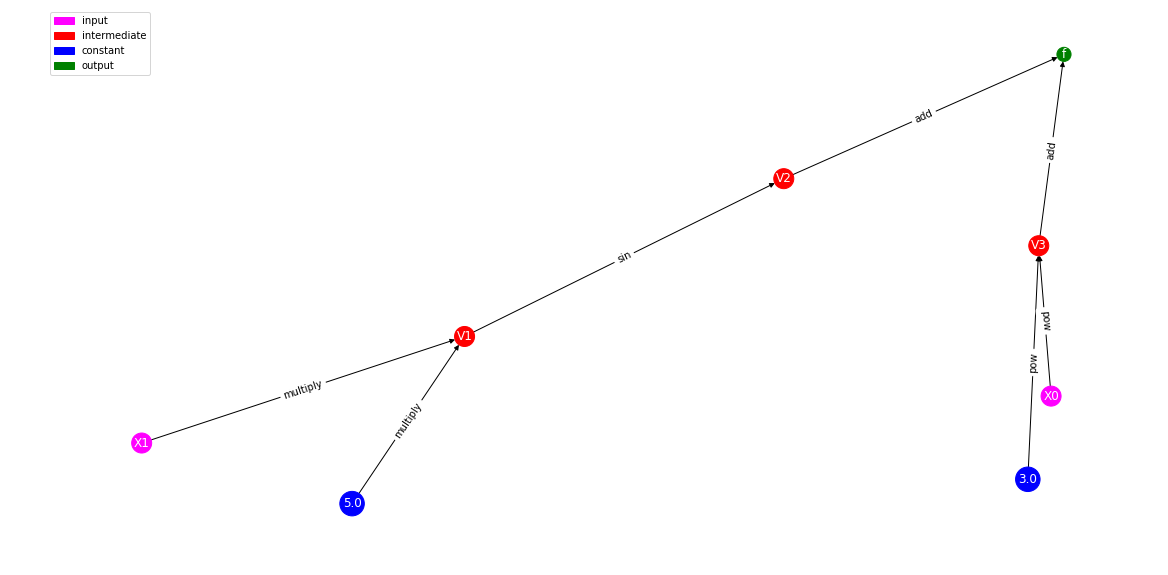

In [15]:
x = ADnum(1, ins =2, ind =0)
y = ADnum(np.pi/5, ins = 2, ind = 1)
f = x**3+ADmath.sin(5*y)

fig3 = ADgraph.draw_graph(f)

#### Generate the Corresponding Forward Computational Table
The function `gen_table` takes an `ADnum` object as input and outputs a table of the computational traces.  Labels correspond to the graph that was generated to improve the connection between the numeric computations and visual connections.  As with the computational graph, this can be used for functions of single or multiple variables. 

In [16]:
ADgraph.gen_table(f)

C:\Users\Lindsey\Documents\lindsey\Harvard G4\FallSemester\CS207Teaching\Auto-eD\ADgraph.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  result['Number'][i] = len(result['Trace'])+1
C:\Users\Lindsey\Documents\lindsey\Harvard G4\FallSemester\CS207Teaching\Auto-eD\ADgraph.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  result['Number'][i] = int(name[1:])
C:\Users\Lindsey\Documents\lindsey\Harvard G4\FallSemester\CS207Teaching\Auto-eD\ADgraph.py:486: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

,Trace,Operation,Value,Derivative
5,X0,input,1.0,"[1.0, 0.0]"
3,X1,input,0.6283185307179586,"[0.0, 1.0]"
2,V1,"multiply(X1 , 5.0)",3.141592653589793,"[0.0, 5.0]"
1,V2,sin(V1),1.2246467991473532e-16,"[-0.0, -5.0]"
4,V3,"pow(X0 , 3.0)",1.0,"[3.0, 0.0]"
0,f,"add(V3 , V2)",1.0000000000000002,"[3.0, -5.0]"


####  Visualizing Reverse Mode
TO DO

## Future Work
TO DO

To contribute to this work, TO DO